# I want to develop my skills in data manipulation and Pytorch 

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
!pip install torch

In [ ]:
!pip install seaborn

In [32]:
import seaborn as sns

In [10]:
import torch
import torch.nn as nn

## Importing Data
 Below I searched for a suitable dataset to train and test a model on, I found a very good dataset on heart pointers and heart attack
 in binary of 1 and 0.
 It's a really clean dataset and so will massively help with just focusing on PyTorch skills for now.

In [16]:
df = pd.read_csv('archive/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Just want to do some exploratory data analysis for now to map out the dataset a bit. I am just going to plot age in a frequency chart.
I will also plot age and blood pressure...

In [53]:
numpy_data = df.values
# need to convert df to numoy array then tensor for further data analysis

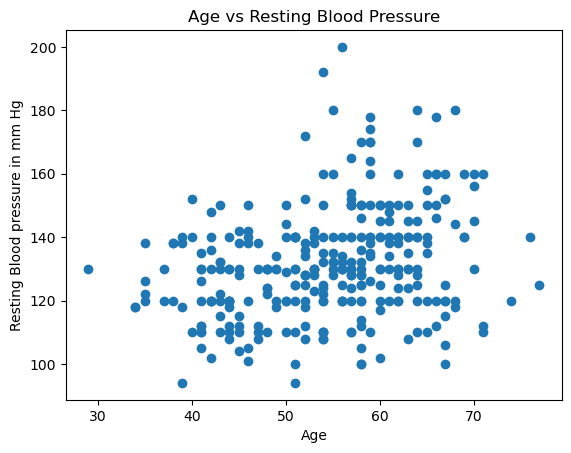

In [50]:
plt.scatter(df['age'], df['trtbps'])
plt.xlabel("Age")
plt.ylabel("Resting Blood pressure in mm Hg")
plt.title("Age vs Resting Blood Pressure")

plt.show()

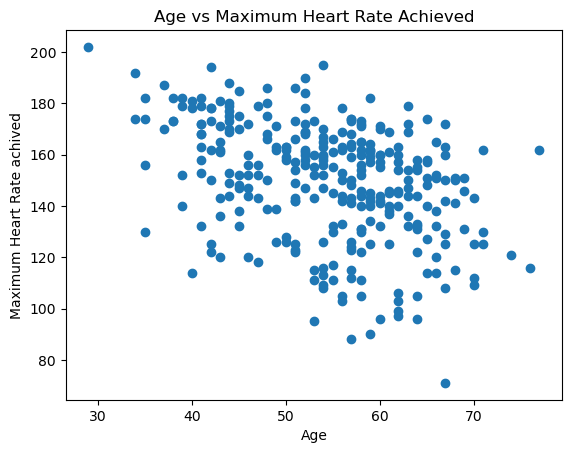

In [30]:
# age and maximum heart rate achieved

plt.scatter(df['age'], df['thalachh'])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate achived")
plt.title("Age vs Maximum Heart Rate Achieved")

plt.show()

### Found out Seaborn is quite a good way of creating more aesthetic plots.

<Axes: xlabel='age', ylabel='trtbps'>

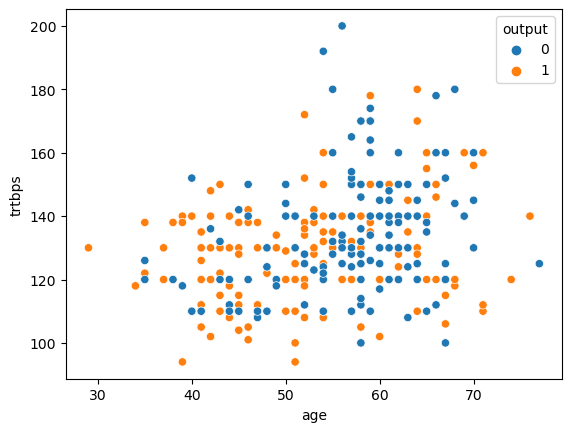

In [35]:
sns.scatterplot(x = "age", y = "trtbps", hue = "output", data = df)

<Axes: xlabel='age', ylabel='thalachh'>

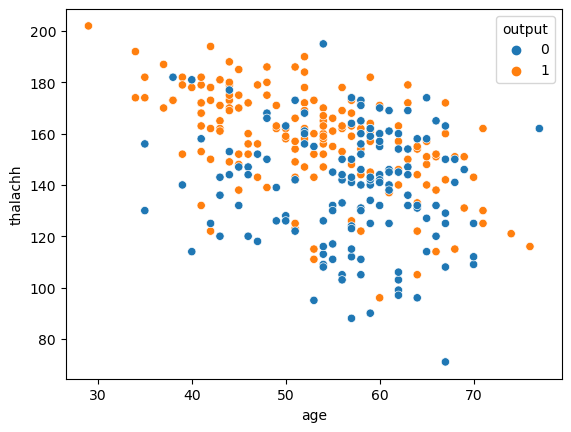

In [36]:
sns.scatterplot(x = "age", y = "thalachh", hue = "output", data = df)

already starting to see a bit of a correlation, lets get onto the Neural Network

In [79]:
heart_model = nn.Sequential(
    nn.Linear(13, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

# splitting up the dataset:

X = torch.tensor(numpy_data[:, :-1], dtype = torch.float)
y = torch.tensor(numpy_data[:,-1], dtype = torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size = .20, random_state = 2)
# want to normalise and then feed in
# Calculate mean and standard deviation for X_train and y_train
X_mean = X_train.mean(dim=0, keepdim=True)
X_std = X_train.std(dim=0, keepdim=True)

y_mean = y_train.mean()
y_std = y_train.std()

# Normalize X_train and y_train
X_train_norm = (X_train - X_mean) / X_std
y_train_norm = (y_train - y_mean) / y_std

# Normalize X_test and y_test using the training statistics
X_test_norm = (X_test - X_mean) / X_std
y_test_norm = (y_test - y_mean) / y_std 


# can do SGD with dataloader and tensordataset
dataset = TensorDataset(X_train_norm, y_train_norm)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Epoch [100/1000], MSE Loss: 0.7627567648887634
Epoch [200/1000], MSE Loss: 0.06966424733400345
Epoch [300/1000], MSE Loss: 0.030181165784597397
Epoch [400/1000], MSE Loss: 0.3775441646575928
Epoch [500/1000], MSE Loss: 0.20536702871322632
Epoch [600/1000], MSE Loss: 0.026654332876205444
Epoch [700/1000], MSE Loss: 0.38859301805496216
Epoch [800/1000], MSE Loss: 0.20020708441734314
Epoch [900/1000], MSE Loss: 0.383774071931839
Epoch [1000/1000], MSE Loss: 0.565270185470581


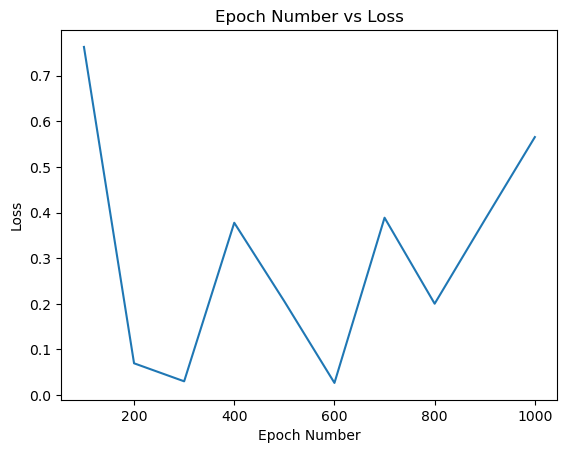

In [82]:
## setting up the trainig loop
loss = nn.MSELoss()
optimizer = optim.Adam(heart_model.parameters(), lr = 0.01)

epochs = 1000
epoch_history = []
loss_history = []
for epoch in range(epochs):
    heart_model.train() # need to set the model to training mode every epoch?

    for batch_X, batch_y in dataloader:
        
        predictions = heart_model(batch_X)
        MSE = loss(predictions.squeeze(), batch_y) # predictions.squeeze()???
        
        # Backward pass, does order of these things matter???
        optimizer.zero_grad()
        MSE.backward()
        optimizer.step()
        
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], MSE Loss: {MSE.item()}')
        epoch_history.append(epoch + 1)
        loss_history.append(MSE.item())
#Havent Normalised the dataset  
plt.plot(epoch_history, loss_history)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Epoch Number vs Loss")
plt.show()

In [ ]:
# a very basic feed forward model class using a good optimizer

class Heart_model:
    def __init__(hidden_layers, activation_functions, epochs, learning_rate):
        super(Heart_model, self).__init__()
        self.hidden_layers = hidden_layers
        self.activation_functions = activation_functions
        self.epochs = epochs
        self.learning_rate = learning_rate
    